# Homework Assignment 1 Roie Kazoom 207376187
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire

For this homework you will need to write code that analyzes real-world datasets. The code needs to be written in Python using the [sqlite3](https://docs.python.org/2/library/sqlite3.html) package.

**Please note:** You need to answer only the questions that match your ID first digit.

# 1. Babies Names Dataset (35pt)

**Task 1 (for everyone):** Write a code that uses the  [**babies names dataset** ](https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv) (use StateNames.csv) and creates a table named (Names) with the dataset data and the following columns: 'State', 'Gender', 'Name', 'Count' , and 'Year' (5pt)
**Bonus:** Load the data using a Batch INSERT SQL Query (2pt)

In [1]:
import sqlite3
import pandas as pd
from pathlib import Path

# Load the StateNames.csv dataset into a Pandas DataFrame
baby_names_df = pd.read_csv('StateNames.csv')

# Create a connection to SQLite database
conn = sqlite3.connect('baby_names.db')
cursor = conn.cursor()

# Define the schema for the 'Names' table
create_table_query = """
CREATE TABLE IF NOT EXISTS Names (
    State TEXT,
    Gender TEXT,
    Name TEXT,
    Count INTEGER,
    Year INTEGER
);
"""

# Execute the create table query
cursor.execute(create_table_query)

# Commit the changes
conn.commit()

# Insert data into the 'Names' table using Batch INSERT SQL Query
insert_query = """
INSERT INTO Names (State, Gender, Name, Count, Year)
VALUES (?, ?, ?, ?, ?);
"""

# Convert DataFrame to list of tuples for batch insertion
data_to_insert = baby_names_df[['State', 'Gender', 'Name', 'Count', 'Year']].values.tolist()

# Execute the Batch INSERT SQL Query
cursor.executemany(insert_query, data_to_insert)

# Commit the changes and close the connection
conn.commit()
conn.close()

In [2]:
# Reconnect to SQLite database
conn = sqlite3.connect('baby_names.db')

# Define the SQL query to select all rows from the 'Names' table
select_query = """
SELECT *
FROM Names
LIMIT 5;
"""

# Execute the query and fetch the results
cursor = conn.cursor()
cursor.execute(select_query)
result = cursor.fetchall()

# Get column names from the cursor description
columns = [description[0] for description in cursor.description]

# Create a DataFrame from the fetched results
result_df = pd.DataFrame(result, columns=columns)

# Print the result
result_df

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


**Task 2 (for everyone):** Write a query that returns the statistics for the name Mary (5pt). Use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run (5pt). **Bonus:** [Create an index](https://www.w3schools.com/sql/sql_create_index.asp)  on the _Name_ column and use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run with the index (5pt)

In [3]:
# Import necessary libraries
import timeit

# Create a connection to SQLite database
conn = sqlite3.connect('baby_names.db')
cursor = conn.cursor()

# Task 2: Query without index and measure the time
query_without_index = """
SELECT Name, Gender, SUM(Count) as TotalCount, AVG(Count) as AvgCount, MIN(Year) as MinYear, MAX(Year) as MaxYear
FROM Names
WHERE Name = 'Mary'
GROUP BY Name, Gender;
"""

time_without_index = timeit.timeit(lambda: pd.read_sql_query(query_without_index, conn), number=1)

print("Query without index:")
result_without_index = pd.read_sql_query(query_without_index, conn)
print(result_without_index)
print(f"Time taken without index: {time_without_index:.6f} seconds")

# Create an index on the 'Name' column
create_index_query = "CREATE INDEX IF NOT EXISTS idx_name ON Names(Name);"
cursor.execute(create_index_query)

# Commit the changes
conn.commit()

# Task 2 Bonus: Query with index and measure the time
query_with_index = """
SELECT Name, Gender, SUM(Count) as TotalCount, AVG(Count) as AvgCount, MIN(Year) as MinYear, MAX(Year) as MaxYear
FROM Names
WHERE Name = 'Mary'
GROUP BY Name, Gender;
"""

time_with_index = timeit.timeit(lambda: pd.read_sql_query(query_with_index, conn), number=1)

print("\nQuery with index:")
result_with_index = pd.read_sql_query(query_with_index, conn)
print(result_with_index)
print(f"Time taken with index: {time_with_index:.6f} seconds")

# Close the connection
conn.close()

Query without index:
   Name Gender  TotalCount    AvgCount  MinYear  MaxYear
0  Mary      F    18654280  701.684409     1910     2014
1  Mary      M       48195    9.145161     1910     2004
Time taken without index: 2.942533 seconds

Query with index:
   Name Gender  TotalCount    AvgCount  MinYear  MaxYear
0  Mary      F    18654280  701.684409     1910     2014
1  Mary      M       48195    9.145161     1910     2004
Time taken with index: 0.249855 seconds


### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **Question = <YOUR_ID> mod 4 +1**) </span>

In [4]:
# which question to answer - put your ID number and run the code
your_id  = "207376187"
q = int(your_id) % 4 + 1
print("You need to answer question number %s" % q)

You need to answer question number 4


***Question 1:*** Write a function that returns how many *female and* male babies were born in a given state in a given year.
Use it to calculate the number of babies born in WA in 2000 (10pt)

***Question 2:*** Write a function that returns how many female babies were born between a given range of years.
Use it to calculate how many babies were born between 1850 and 1950  (10pt)

**Question 3:** Write a function that returns the most common female name in a given state. Use it to calculate the most common female name in CA in 1999 (10pt)

**Question 4:** Write a function that returns how many male babies named _Robert_ where born in a given state in a given year. Use it to find the state in which the highest number of babies _Robert_ where born in 1950 (10pt)

In [5]:
def get_robert_births(state, year):
    """
    Get the number of male babies named Robert born in a given state in a given year.
    
    Parameters:
    - state (str): The state for which to retrieve the information.
    - year (int): The year for which to retrieve the information.
    
    Returns:
    - int: Number of male babies named Robert born in the specified state and year.
    """
    conn = sqlite3.connect('baby_names.db')
    cursor = conn.cursor()

    query = """
    SELECT SUM(Count) as RobertBirths
    FROM Names
    WHERE Name = 'Robert' AND Gender = 'M' AND State = ? AND Year = ?;
    """

    result = cursor.execute(query, (state, year)).fetchone()
    robert_births = result[0] if result else 0

    conn.close()

    return robert_births

# Find the state with the highest number of babies named Robert in 1950
year_of_interest = 1950

# Get Robert births for all states in 1950
robert_births_by_state = [(state, get_robert_births(state, year_of_interest)) for state in set(baby_names_df['State'])]

# Find the state with the highest number of Robert births in 1950
max_robert_births_state = max(robert_births_by_state, key=lambda x: x[1])

print(
f"In {year_of_interest}, the state with the highest number of babies named Robert was {max_robert_births_state[0]} with {max_robert_births_state[1]} births.")

In 1950, the state with the highest number of babies named Robert was NY with 43110 births.


**Question (for everyone):** For the state of CA write code that calculates the third most popular female/male names in each decade (10pt). **Bonus**: Visualize it somehow using Matplotlib (5pt)

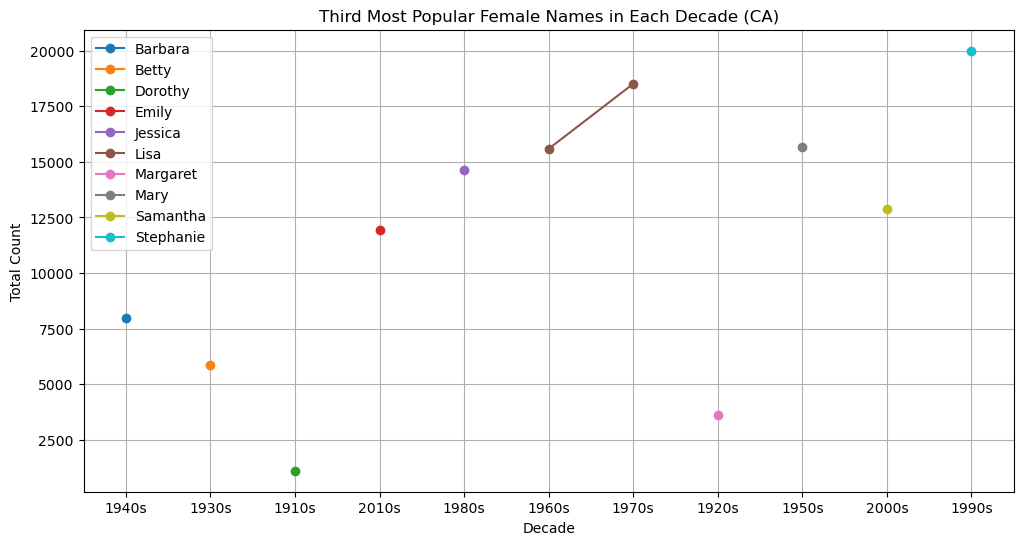

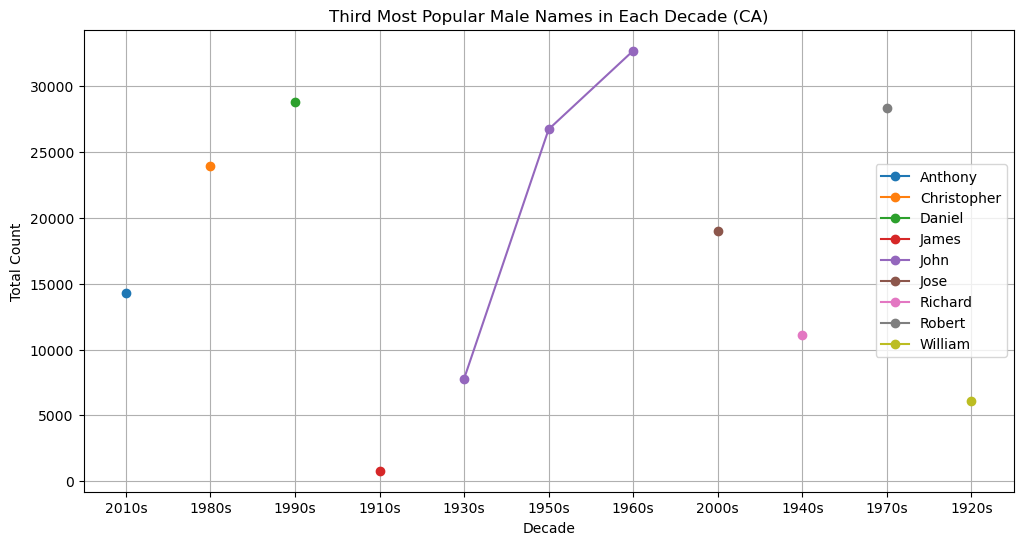

In [6]:
import matplotlib.pyplot as plt

# Function to calculate the third most popular names in each decade
def calculate_third_most_popular_names(state, gender):
    conn = sqlite3.connect('baby_names.db')
    cursor = conn.cursor()

    query = """
    SELECT SUBSTR(CAST(Year AS TEXT), 1, 3) || '0s' AS Decade, Name, SUM(Count) AS TotalCount
    FROM Names
    WHERE State = ? AND Gender = ? AND Year % 10 = 0
    GROUP BY Decade, Name
    ORDER BY Decade, TotalCount DESC
    """

    result = pd.read_sql_query(query, conn, params=(state, gender))

    # Calculate the third most popular names in each decade
    third_most_popular_names = result.groupby('Decade').apply(lambda x: x.nlargest(3, 'TotalCount').tail(1))

    conn.close()

    return third_most_popular_names[['Decade', 'Name', 'TotalCount']]

# Calculate the third most popular female names in each decade for CA
third_most_popular_female_names = calculate_third_most_popular_names('CA', 'F')

# Calculate the third most popular male names in each decade for CA
third_most_popular_male_names = calculate_third_most_popular_names('CA', 'M')

# Bonus: Visualize the results using Matplotlib
def plot_third_most_popular_names(names_df, gender):
    plt.figure(figsize=(12, 6))
    plt.title(f'Third Most Popular {gender} Names in Each Decade (CA)')
    for name, group in names_df.groupby('Name'):
        plt.plot(group['Decade'], group['TotalCount'], label=name, marker='o')

    plt.xlabel('Decade')
    plt.ylabel('Total Count')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize the results for female names
plot_third_most_popular_names(third_most_popular_female_names, 'Female')

# Visualize the results for male names
plot_third_most_popular_names(third_most_popular_male_names, 'Male')

# 2. Flavors of Cacao Dataset (15pt)

Using the [Flavors of Cacao](https://www.kaggle.com/rombikuboktaeder/choco-flavors) dataset, answer the following questions:

**Question 1:** Write a function that returns the number of bars manufactured where the bars' BroadBean Origin is a given country. Use the function to calculate the number of bars where BroadBean Origin is 'Ecuador' (15pt)

In [7]:
# Load the flavors_of_cacao.csv dataset into a Pandas DataFrame
cacao_df = pd.read_csv("flavors_of_cacao.csv")

# Create a connection to SQLite database
conn = sqlite3.connect('flavors_of_cacao.db')

# Save the DataFrame to an SQLite table named 'ChocolateBars'
cacao_df.to_sql('ChocolateBars', conn, index=False, if_exists='replace')

# Commit the changes and close the connection
conn.commit()
conn.close()

# Function to count bars by BroadBean Origin
def count_bars_by_origin(country):
    conn = sqlite3.connect('flavors_of_cacao.db')
    cursor = conn.cursor()

    query = """
    SELECT COUNT(*) as BarCount
    FROM ChocolateBars
    WHERE "Broad Bean\nOrigin" = ?;
    """

    result = cursor.execute(query, (country,)).fetchone()
    bar_count = result[0] if result else 0

    conn.close()

    return bar_count

# Example: Calculate the number of bars where BroadBean Origin is 'Ecuador'
ecuador_bar_count = count_bars_by_origin('Ecuador')

print(f"The number of bars manufactured in Ecuador is: {ecuador_bar_count}")

The number of bars manufactured in Ecuador is: 193


In [8]:
cacao_df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

**Question 2:** Write a function that returns the maximal and average cocoa percentage in a bar manufactured by a company in a specific country. Use the function to calculate the minimal and average cocoa percentage in bars manufactured by a Swiss company (15pt).

In [9]:
# Function to calculate maximal and average cocoa percentage for all companies in a specific country
def calculate_cocoa_stats(country):
    conn = sqlite3.connect('flavors_of_cacao.db')
    cursor = conn.cursor()

    query = """
    SELECT "Company \n(Maker-if known)", MAX("Cocoa\nPercent") as MaxCocoa, AVG("Cocoa\nPercent") as AvgCocoa
    FROM ChocolateBars
    WHERE "Company\nLocation" = ?
    GROUP BY "Company \n(Maker-if known)";
    """

    result = cursor.execute(query, (country,)).fetchall()
    
    cocoa_stats_by_company = pd.DataFrame(result, columns=['Company', 'MaxCocoa', 'AvgCocoa'])
    
    conn.close()

    return cocoa_stats_by_company

# Example: Calculate maximal and average cocoa percentage for all companies in Switzerland
swiss_country = "Switzerland"
cocoa_stats_switzerland = calculate_cocoa_stats(swiss_country)

# Display the results
print("Maximal and Average Cocoa Percentage for Companies in Switzerland:")
print(cocoa_stats_switzerland)

Maximal and Average Cocoa Percentage for Companies in Switzerland:
                      Company MaxCocoa   AvgCocoa
0  Company \n(Maker-if known)      88%  71.210526


**Question 3:** Calculate the second most common bean type(s) and the most rare bean type(s) (15
pt)

**Question 4:** Calculate the number of reviews and the average rating in each year. Calculate the number of reviews and the average rating of each company in each year (15pt)

In [10]:
# Function to calculate the number of reviews and average rating in each year
def calculate_reviews_and_ratings_by_year():
    conn = sqlite3.connect('flavors_of_cacao.db')
    cursor = conn.cursor()

    # Calculate the number of reviews and average rating in each year
    query_reviews_and_ratings_by_year = """
    SELECT "Review\nDate" as Year, COUNT(*) as NumReviews, AVG(Rating) as AvgRating
    FROM ChocolateBars
    GROUP BY Year
    ORDER BY Year;
    """
    
    reviews_and_ratings_by_year = pd.read_sql_query(query_reviews_and_ratings_by_year, conn)

    conn.close()

    return reviews_and_ratings_by_year

# Function to calculate the number of reviews and average rating of each company in each year
def calculate_reviews_and_ratings_by_company_and_year():
    conn = sqlite3.connect('flavors_of_cacao.db')
    cursor = conn.cursor()

    # Calculate the number of reviews and average rating of each company in each year
    query_reviews_and_ratings_by_company_and_year = """
    SELECT "Review\nDate" as Year, "Company \n(Maker-if known)" as Company, COUNT(*) as NumReviews, AVG(Rating) as AvgRating
    FROM ChocolateBars
    GROUP BY Year, Company
    ORDER BY Year, AvgRating DESC;
    """
    
    reviews_and_ratings_by_company_and_year = pd.read_sql_query(query_reviews_and_ratings_by_company_and_year, conn)

    conn.close()

    return reviews_and_ratings_by_company_and_year

# Example: Calculate reviews and ratings by year
reviews_and_ratings_by_year = calculate_reviews_and_ratings_by_year()

# Example: Calculate reviews and ratings by company and year
reviews_and_ratings_by_company_and_year = calculate_reviews_and_ratings_by_company_and_year()

# Display the results
print("Number of Reviews and Average Rating by Year:")
print(reviews_and_ratings_by_year)

print("\nNumber of Reviews and Average Rating by Company and Year:")
print(reviews_and_ratings_by_company_and_year)

Number of Reviews and Average Rating by Year:
    Year  NumReviews  AvgRating
0   2006          72   3.125000
1   2007          77   3.162338
2   2008          93   2.994624
3   2009         123   3.073171
4   2010         111   3.148649
5   2011         165   3.256061
6   2012         195   3.178205
7   2013         184   3.197011
8   2014         247   3.189271
9   2015         285   3.246491
10  2016         219   3.226027
11  2017          24   3.312500

Number of Reviews and Average Rating by Company and Year:
    Year                     Company  NumReviews  AvgRating
0   2006  Company \n(Maker-if known)          72   3.125000
1   2007  Company \n(Maker-if known)          77   3.162338
2   2008  Company \n(Maker-if known)          93   2.994624
3   2009  Company \n(Maker-if known)         123   3.073171
4   2010  Company \n(Maker-if known)         111   3.148649
5   2011  Company \n(Maker-if known)         165   3.256061
6   2012  Company \n(Maker-if known)         195   3.178205

In [11]:
# Checking myself with Pandas. # JUST FOR CHECK

# Load the flavors_of_cacao.csv dataset into a Pandas DataFrame
cacao_df = pd.read_csv("flavors_of_cacao.csv", parse_dates=['Review\nDate'], dayfirst=True)

# Calculate the number of reviews and average rating in each year
result_by_year = cacao_df.groupby(cacao_df['Review\nDate'].dt.year).agg(
    NumReviews=('Review\nDate', 'size'),
    AvgRating=('Rating', 'mean')
).reset_index()

# Display the results
result_by_year

,Review\nDate,NumReviews,AvgRating
0,2006,72,3.125000
1,2007,77,3.162338
2,2008,93,2.994624
3,2009,123,3.073171
4,2010,111,3.148649
5,2011,165,3.256061
6,2012,195,3.178205
7,2013,184,3.197011
8,2014,247,3.189271
9,2015,285,3.246491


# 3. Kickstarter Projects Dataset (25pt)

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv), answer the following questions:

**Task 1 (for everyone):** Load the dataset to SQLite DB using [PonyORM](https://ponyorm.org) (10pt)

In [13]:
import pandas as pd
from pony.orm import Database, Required, Optional, Set, db_session, sql_debug
import os
from decimal import Decimal
from datetime import datetime

from pony.orm import *

# Get the absolute path to the current working directory
current_dir = os.path.abspath(os.getcwd())

# Create a new database
db = Database()
db.bind(provider='sqlite', filename=os.path.join(current_dir, 'kickstarter_pony.db'), create_db=True)

# Read the CSV file into a DataFrame
df = pd.read_csv('ks-projects-201612.csv', encoding='ISO-8859-1')

# Drop unnamed columns
df = df.loc[:, ~df.columns.str.startswith('Unnamed')]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Remove trailing spaces from column names
df.columns = df.columns.str.strip()

# Convert the 'launched' column to datetime using a custom function
def parse_datetime(value):
    try:
        return datetime.strptime(value, "%Y-%m-%d %H:%M:%S")
    except (ValueError, TypeError):
        return None

df['launched'] = df['launched'].apply(parse_datetime)

# Drop the 'id' and 'usd pledged' columns
df.drop(['ID', 'usd pledged', 'pledged', 'category'], axis=1, inplace=True)

# Convert the 'name' column to strings
df['name'] = df['name'].astype(str)

# Convert the DataFrame to a list of dictionaries
data = df.to_dict(orient='records')

# Define the Pony ORM entities (tables) with updated column names
class KickstarterProject(db.Entity):
    name = Required(str)
    main_category = Required(str)
    currency = Required(str)
    deadline = Required(str)
    goal = Required(str)
    launched = Required(datetime, default=datetime.utcnow)
    state = Required(str)
    backers = Required(str)
    country = Required(str)
    category = Optional(str, default='Uncategorized')  # Provide a default value

# Generate the mapping
db.generate_mapping(create_tables=True)

# Insert the data into the database
with db_session:
    for row in data:
        KickstarterProject(**row)

C:\Users\kazom\AppData\Local\Temp\ipykernel_17856\3654622946.py:17: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ks-projects-201612.csv', encoding='ISO-8859-1')


### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [15]:
# which question to answer - put your ID number and run the code
your_id  = "207376187"
q = int(your_id) % 3 + 1
print("You need to answer question number %s" % q)

You need to answer question number 3


**Question 1:** On average which project category received the highest number of backers? (15 pt)

**Question 2:** On average which project category received the highest pledged USD? (15 pt)

**Question 3:** In which month occurred the highest number of projects? (15 pt)

In [2]:
import sqlite3
import pandas as pd

# Load the dataset with explicit encoding
df = pd.read_csv('ks-projects-201612.csv', encoding='ISO-8859-1')

# Assuming the correct column name contains 'launched', update the following line accordingly
date_column_name = [col for col in df.columns if 'launched' in col.lower()][0]
df[date_column_name] = pd.to_datetime(df[date_column_name], errors='coerce')

# Extract the month from the datetime column
df['launch_month'] = df[date_column_name].dt.month

# Create a connection to SQLite database
conn = sqlite3.connect('kickstarter.db')

# Save the DataFrame to an SQLite table named 'Projects'
df.to_sql('Projects', conn, index=False, if_exists='replace')

# Commit the changes and close the connection
conn.commit()
conn.close()

# Reconnect to the SQLite database
conn = sqlite3.connect('kickstarter.db')

# Query to count the number of projects for each month
query = "SELECT launch_month, COUNT(*) as project_count FROM Projects GROUP BY launch_month"

# Execute the query and fetch the result into a DataFrame
project_counts_by_month = pd.read_sql(query, conn)

# Identify the month with the highest number of projects
max_month = project_counts_by_month['project_count'].idxmax()

print(f"The month with the highest number of projects is {max_month}.")

C:\Users\kazom\AppData\Local\Temp\ipykernel_2836\1905838180.py:5: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ks-projects-201612.csv', encoding='ISO-8859-1')


The month with the highest number of projects is 7.


In [16]:
# The answer using pandas

# Load the dataset with explicit encoding
import pandas as pd
df = pd.read_csv('ks-projects-201612.csv', encoding='ISO-8859-1')

# Inspect the columns or display the first few rows to find the correct column name
# Uncomment one of the following lines based on your preference:
# print(df.columns)
# print(df.head())

# Assuming the correct column name contains 'launched', update the following line accordingly
date_column_name = [col for col in df.columns if 'launched' in col.lower()][0]
df[date_column_name] = pd.to_datetime(df[date_column_name], errors='coerce')

# Extract the month from the datetime column
df['launch_month'] = df[date_column_name].dt.month

# Count the number of projects for each month
project_counts_by_month = df['launch_month'].value_counts()

# Identify the month with the highest number of projects
max_month = project_counts_by_month.idxmax()

print(f"The month with the highest number of projects is {max_month}.")

C:\Users\kazom\AppData\Local\Temp\ipykernel_17856\1395648873.py:3: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ks-projects-201612.csv', encoding='ISO-8859-1')


The month with the highest number of projects is 7.0.


In [17]:
# Another method using pandas

# Load the dataset with explicit encoding
kickstarter_df = pd.read_csv('ks-projects-201612.csv', encoding='ISO-8859-1')

# Convert the 'launched ' column to datetime
kickstarter_df['launched '] = pd.to_datetime(kickstarter_df['launched '], errors='coerce')

# Create a new column for the month
kickstarter_df['launch_month'] = kickstarter_df['launched '].dt.month

# Calculate the number of projects launched in each month
result_by_month = kickstarter_df.groupby('launch_month').agg(
    NumProjects=('ID ', 'count'),
).reset_index()

# Display the results
result_by_month

C:\Users\kazom\AppData\Local\Temp\ipykernel_17856\3795483268.py:2: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter_df = pd.read_csv('ks-projects-201612.csv', encoding='ISO-8859-1')


,launch_month,NumProjects
0,1.0,23256
1,2.0,25655
2,3.0,28647
3,4.0,27825
4,5.0,28028
5,6.0,28054
6,7.0,32085
7,8.0,27882
8,9.0,26928
9,10.0,28747


## 4. Oscars Datasets (10pt)

Using the [Oscars Dataset](https://www.kaggle.com/theacademy/academy-awards), please answer only one of the following questions (you can chose):

**Question 1:** Who is the male actress with the most Oscar nominees? (10pt)

**Question 2:** Who is the female director with the most Oscar nominees? (10pt)

**Question 3:** Which top-10 movies received the highest number of Oscar nominees? (10pt)

In [20]:
import sqlite3
import pandas as pd

# Load the Oscars dataset
oscars_df = pd.read_csv('database.csv')

# Create a SQLite connection and cursor
conn = sqlite3.connect('oscars.db')
cursor = conn.cursor()

# Create a table in the database and insert data
oscars_df.to_sql('oscars_table', conn, index=False, if_exists='replace')

# Execute a query to find the top 10 movies with the highest number of Oscar nominees
query = '''
    SELECT Film, COUNT(*) AS NumNominees
    FROM oscars_table
    GROUP BY Film
    ORDER BY NumNominees DESC
    LIMIT 10;
'''

top_10_movies = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the result
print(top_10_movies)

                            Film  NumNominees
0                           None          333
1            Metro-Goldwyn-Mayer           60
2          Walt Disney, Producer           57
3                Warner Brothers           42
4                  John Williams           42
5                         France           36
6                  Alfred Newman           34
7                          Italy           27
8                      Paramount           24
9  Gordon Hollingshead, Producer           22


In [18]:
# The answer using pandas

# Load the Oscars dataset
oscars_df = pd.read_csv('database.csv')

# Group by movie and count the number of nominations
movie_nomination_counts = oscars_df.groupby('Film')['Film'].count()

# Sort the movies by the number of nominations in descending order
sorted_movies = movie_nomination_counts.sort_values(ascending=False)

# Get the top 10 movies
top_10_movies = sorted_movies.head(10)

print("Top 10 movies with the highest number of Oscar nominations:")
print(top_10_movies)

Top 10 movies with the highest number of Oscar nominations:
Film
Metro-Goldwyn-Mayer              60
Walt Disney, Producer            57
John Williams                    42
Warner Brothers                  42
France                           36
Alfred Newman                    34
Italy                            27
Paramount                        24
Edith Head                       22
Gordon Hollingshead, Producer    22
Name: Film, dtype: int64


**Question 4:** Write a function that receives an actor's name and returns the actor’s number of Oscar nominees. Use the function to calculate the number of times Leonardo DiCaprio was a nominee (10pt)

## 5.  Cool Bonus: LLMs & Stable Difussion (10pt)

Using GPT-2 (or any other LLM model), create a simple code that generates a bedtime story with 10-page of related images.

## I did it using Google Colab, a different link has been attached.

### https://colab.research.google.com/drive/1mMJaef9Woh8nao75oJASKYK3oUr1uXzE#scrollTo=AkhAt8J3OTVw